In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from scipy.optimize import minimize
import math as math
import scipy.stats as stats
%matplotlib inline

In [5]:
df = pd.read_csv('data1.csv')

In [10]:
lambda_exp = 1/(df['data'].mean())

def exponential(x):
    return (lambda_exp*np.exp(-lambda_exp*x))

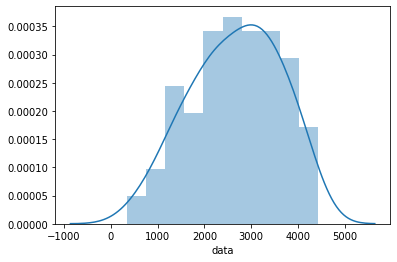

In [11]:
sns.distplot(df['data'],bins=10)

In [13]:
# chi squared distribution
mean = df['data'].mean()
sd = df['data'].std()
quater_percentile = df['data'].loc[4]
bin = (mean-quater_percentile)*2

cs_df = pd.DataFrame(index=[1,2,3,4,5,6,7,8],columns=['Interval_min','Interval_max','ni','pi','ei','ni_sq_by_ei'])
cs_df['Interval_min'].loc[5] = cs_df['Interval_max'].loc[4] = mean
cs_df['Interval_min'].loc[4] = cs_df['Interval_max'].loc[3] = mean - bin
cs_df['Interval_min'].loc[3] = cs_df['Interval_max'].loc[2] = mean - 2*bin
cs_df['Interval_min'].loc[2] = cs_df['Interval_max'].loc[1] = mean - 3*bin
cs_df['Interval_max'].loc[1] = mean - 3*bin
cs_df['Interval_min'].loc[1] = df['data'].min()
cs_df['Interval_min'].loc[6] = cs_df['Interval_max'].loc[5] = mean + bin
cs_df['Interval_min'].loc[7] = cs_df['Interval_max'].loc[6] = mean + 2*bin
cs_df['Interval_min'].loc[8] = cs_df['Interval_max'].loc[7] = mean + 3*bin
cs_df['Interval_min'].loc[8] = mean + 3*bin
cs_df['Interval_max'].loc[8] = df['data'].max()

for i in cs_df.index:
    cs_df['ni'][i] = df[(df['data']>cs_df['Interval_min'][i]) & (df['data']<cs_df['Interval_max'][i])]['data'].count()
#     cs_df['pi'][i] = quad(exponential,np.NINF,cs_df['Interval_max'][i])[0] - quad(exponential,np.NINF,cs_df['Interval_min'][i])[0]
    cs_df['pi'][i] = quad(exponential,cs_df['Interval_min'][i],cs_df['Interval_max'][i])[0]
    cs_df['ei'][i] = df['data'].size * cs_df['pi'][i]
    cs_df['ni_sq_by_ei'] = (cs_df['ni']**2)/cs_df['ei']
    
print(cs_df)
    
test_stat_value = cs_df['ni_sq_by_ei'].sum() - df['data'].size

chi_df = pd.read_csv('chi_table.csv')

alpha = 0.05
dof = cs_df['Interval_min'].size-1

columns = np.array(chi_df.columns)
# print(columns)
for i in range(len(columns)):
    if columns[i] == str(alpha):
        alpha_col_index = i
        
critical_value = chi_df.iloc[dof-1,alpha_col_index]

print(critical_value , test_stat_value)

if critical_value<=test_stat_value:
    print("Reject Null Hypothesis")
else:
    print("Failed to reject Null hypothesis")

  Interval_min Interval_max  ni         pi       ei ni_sq_by_ei
1       346.63      1883.62  20   0.384553  38.4553     10.4017
2      1883.62      2145.08  11  0.0460779  4.60779     26.2599
3      2145.08      2406.53   7  0.0417765  4.17765     11.7291
4      2406.53      2667.99   8  0.0378768  3.78768     16.8969
5      2667.99      2929.44  11   0.034341   3.4341     35.2348
6      2929.44       3190.9   8  0.0311353  3.11353     20.5554
7       3190.9      3452.35  13  0.0282289  2.82289     59.8677
8      3452.35      4433.67  20  0.0843777  8.43777     47.4059
14.067 128.3514067980919
Reject Null Hypothesis
